# Exploring and processing data

In [1]:
import numpy as np
import pandas as pd
import os

## Import data

In [2]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
train_df = pd.read_csv(train_file_path, index_col = "PassengerId")
test_df = pd.read_csv(test_file_path, index_col = "PassengerId")

In [4]:
print(f"The dataset has {train_df.shape[0]} observations and {train_df.shape[1]} features")

The dataset has 891 observations and 11 features


In [5]:
print(f"The dataset has {test_df.shape[0]} observations and {test_df.shape[1]} features")

The dataset has 418 observations and 10 features


## Basic structure of data

In [6]:
# The columns in the training dataset
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**SibSp**- Number of sibling/spouses aboard, **Pclass** - Passenger class (1 - 1st Class, 2 - 2nd Class, 3 - 3rd Class), **Parch** - Number of parents/children aboard, **Ticket** - Ticket number, **Embarked** - point of embarkment ( C - Cherbourg, Q - Queenstown, S - Southampton) 

In [7]:
# Data types for each column
train_df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [8]:
# Statistics for non-string columns
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Number of nulls per column
train_df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
# Test data columns
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# Data types of each column
test_df.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [12]:
# Number of nulls per column
test_df.isnull().sum() # OR test_df.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [13]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
test_df['Survived'] = -1 # Column added to make the test and train datas have similar structure, -1 is an arbitrary value

In [15]:
df = pd.concat([train_df, test_df])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Selecting columns

In [17]:
# Single column
df.Name # OR df['Name']

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [18]:
# Multiple columns
df[["Name", "Age"]]

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0
...,...,...
1305,"Spector, Mr. Woolf",NaN
1306,"Oliva y Ocana, Dona. Fermina",39.0
1307,"Saether, Mr. Simon Sivertsen",38.5


### Indexing

Use **.loc** for label indexing

In [19]:
df.loc[5:10,"Age":"Fare"] # Selecting column range

,Age,SibSp,Parch,Ticket,Fare
PassengerId,,,,,
5,35.0,0,0,373450,8.0500
6,NaN,0,0,330877,8.4583
7,54.0,0,0,17463,51.8625
8,2.0,3,1,349909,21.0750
9,27.0,0,2,347742,11.1333
10,14.0,1,0,237736,30.0708


In [20]:
df.loc[5:10, ] # Selecting all columns for rows with index 5 to 10

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [21]:
df.loc[5:10, ['Survived', 'Pclass', 'Parch']] # Selecting discrete columns

,Survived,Pclass,Parch
PassengerId,,,
5,0,3,0
6,0,3,0
7,0,1,0
8,0,3,1
9,1,3,2
10,1,2,0


Use **.iloc** for position indexing

In [22]:
df.iloc[5:10, 3:8]

,Sex,Age,SibSp,Parch,Ticket
PassengerId,,,,,
6,male,NaN,0,0,330877
7,male,54.0,0,0,17463
8,male,2.0,3,1,349909
9,female,27.0,0,2,347742
10,female,14.0,1,0,237736


### Summary statistics

In [23]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,-0.058060,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.760044,0.837836,14.413493,1.041658,0.865560,51.758668
min,-1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,-1.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [24]:
df.Fare.std()

51.75866823917414

In [25]:
df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,-0.058060,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,0.760044,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,-1.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,-1.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [26]:
df.Embarked.value_counts() # the count of the unique values in a categorical column

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [27]:
df.Sex.value_counts(normalize=True) # gives the proportions of the categorical data

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [28]:
df[df['Survived']!= -1].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

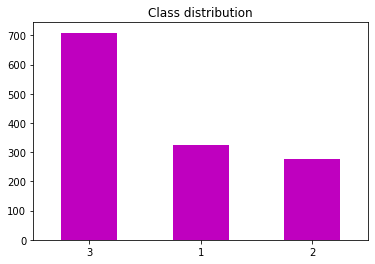

In [29]:
df.Pclass.value_counts().plot(kind='bar', rot=0, title='Class distribution', color='m');# ; suppresses matplotlib output

### Distribution

#### Histogram

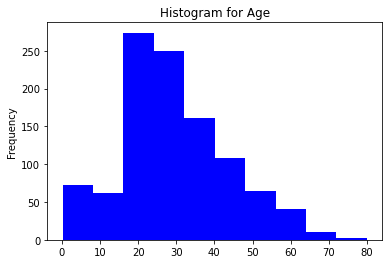

In [35]:
df.Age.plot(kind='hist', title='Histogram for Age', color='b');

Pandas skips all missing values while creating a histogram and creates few bins by default

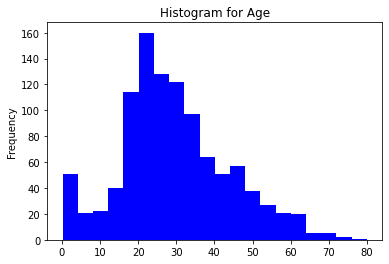

In [36]:
# use bins parameter to increase or decrease the number of bins
df.Age.plot(kind='hist', title='Histogram for Age', color='b', bins=20);

#### Kernel Density Estimation (KDE)

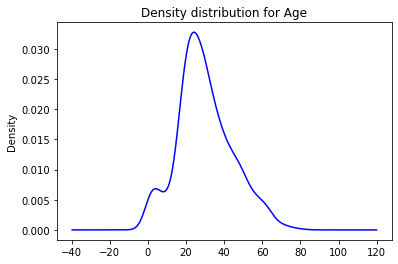

In [37]:
df.Age.plot(kind='kde', title='Density distribution for Age', color='b');

In [43]:
# Finding skewness of a distribution
print(f"Skewness for fare:{round(df.Fare.skew(), 2)}")

Skewness for fare:4.37


#### Scatterplot

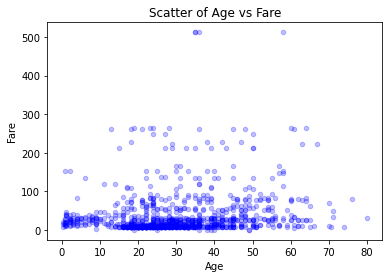

In [44]:
df.plot.scatter(x='Age', y='Fare', color='b', title='Scatter of Age vs Fare', alpha=.25); # alpha parameter is for opacity

### Grouping

In [50]:
df.groupby('Sex').Age.median() # group by sex and extract the median age for each group

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [51]:
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [58]:
df.groupby(["Pclass"])[["Age", "Fare"]].median() # use a list instead of a tuple for grouping

,Age,Fare
Pclass,,
1,39.0,60.0000
2,29.0,15.0458
3,24.0,8.0500


In [60]:
df.groupby(["Pclass"]).agg({"Fare":"mean", "Age":"median"}) # handling multiple summaries for the goupings in one go

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [61]:
df.groupby(["Pclass", "Embarked"]).Fare.median()

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

### Crosstab

In [62]:
# crosstab on sex and pclass
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


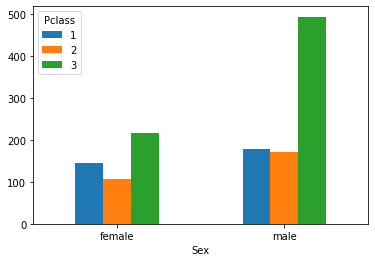

In [64]:
# you can plot the crosstab results
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar', rot=0);

### Pivots

In [71]:
pd.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean', data = df) 
# or df.pivot_table(index='Sex', columns='Pclass', values='Age', aggfunc='mean') 

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


You can achieve pivot tables in many ways in Pandas as shown below

In [72]:
df.groupby(["Sex", 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

We can unstack the results using unstack() function

In [74]:
df.groupby(['Sex', 'Pclass']).Age.mean().unstack() # this gives the same result as pivot_table

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


## Data Munging:Working with missing values

In [76]:
df.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

### Feature: Embarked

In [78]:
df[df.Embarked.isnull()] # rows with missing embarked values

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [79]:
# how many embarked at different points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [80]:
# embarkement point with many survivors
pd.crosstab(df[df.Survived != -1].Survived, df[df.Survived != -1].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


We replace the missing embarkement value with **S** for Southamptom

In [81]:
#df.Embarked.fillna('S', inplace=True)
#df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'

In [84]:
# option 2: explore the fare for each class for each embarkement point
df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


The missing values have a fare of 80 and belong to first class hence the embarkement point of **C** is mostly likely as indicated by the fare grouping above

In [85]:
df.Embarked.fillna('C', inplace = True)

In [87]:
df[df.Embarked.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [89]:
df.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       0
dtype: int64

### Feature: Fare

In [91]:
df[df.Fare.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1044,-1,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [93]:
df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,78.2667,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [94]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
median_fare

8.05

In [95]:
df.Fare.fillna(median_fare, inplace=True)

In [96]:
df[df.Fare.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [97]:
df.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
dtype: int64

### Feature: Age

In [98]:
# rows with missing age
df[df.Age.isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
1300,-1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1302,-1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1305,-1,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S


#### Option 1: Replace missing age with mean age

In [99]:
df.Age.mean()

29.881137667304014

We check the age distribution using a histogram to check if the mean is affected by any outlier

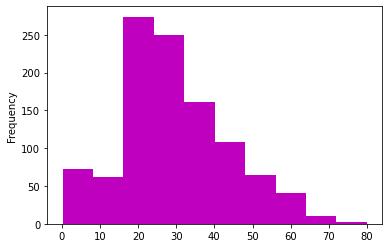

In [100]:
df.Age.plot(kind='hist', color='m');

**N/B**: The few 70's and 80's ages affected the mean so it could be less accurate

#### Option 2: Replace with medain age of gender

In [101]:
df.groupby("Sex").Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

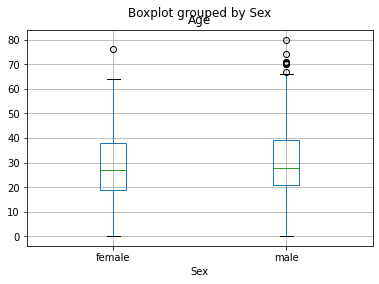

In [107]:
df[df.Age.notnull()].boxplot("Age", "Sex");

The distributions are almost the same

In [103]:
#median_age_by_sex = df.groupby("Sex").Age.transform('media')
# df.Age.fillna(median_age_by_sex, inplace = True)

#### Option 3: Replace with median age of Passenger Class

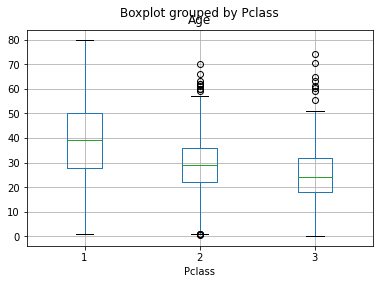

In [106]:
df[df.Age.notnull()].boxplot('Age', 'Pclass');

#### Option 4: Replace with median age of title

In [108]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

The names have a pattern i.e Family name, title then given name

In [109]:
# A function to extract the titles
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [110]:
df.Name.map(GetTitle) # OR df.Name.map(lambda x: GetTitle(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [111]:
#unique titles
df.Name.map(GetTitle).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [112]:
# A function with our custom titles
def GetTitle(name):
    title_group = {'mr': 'Mr', 'mrs': 'Mrs', 'miss': 'Miss', 'master': 'Master','don': 'Sir', 'rev': 'Sir',
                  'dr': 'Officer', 'mme':'Mrs', 'ms': 'Mrs', 'major': 'Officer', 'lady': 'Lady', 'sir': 'Sir', 
                  'mlle': 'Miss', 'col': 'Officer', 'capt': 'Officer', 'the countess': 'Lady', 'jonkheer': 'Sir', 
                   'dona': 'Lady'}
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [114]:
# Create a new column for titles
df['Title'] = df.Name.map(GetTitle)

In [115]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


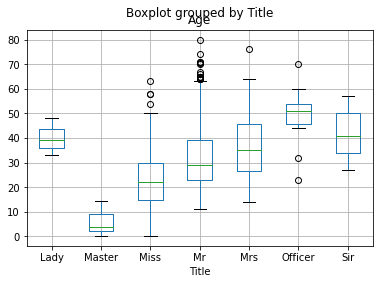

In [117]:
# Boxplot of Age with Title
df[df.Age.notnull()].boxplot('Age', 'Title');

In [118]:
# Replace mising values
median_age_with_title = df.groupby('Title').Age.transform('median')
df.Age.fillna(median_age_with_title, inplace = True)

In [119]:
df.isna().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin       1014
Embarked       0
Title          0
dtype: int64

## Data Munging: Working with outliers

#### Feature: Age

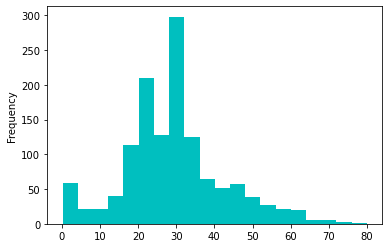

In [121]:
df.Age.plot(kind='hist', color='c', bins=20);

In [123]:
df.loc[df.Age>70]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Mr
494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,Mr
852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,Mr
988,-1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,Mrs


#### Feature: Fare

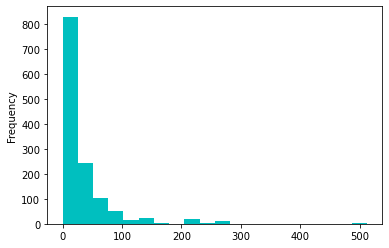

In [125]:
df.Fare.plot(kind='hist', color='c', bins=20);

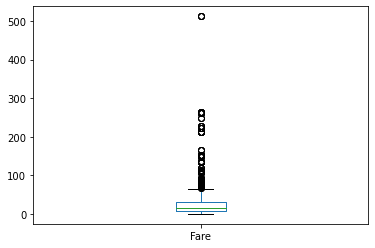

In [127]:
# boxplot for fare
df.Fare.plot(kind='box');

In [128]:
df.loc[df.Fare == df.Fare.max()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr
1235,-1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs


In [132]:
# Try some transformation to reduce skewness
LogFare = np.log(df.Fare + 1.0) # Adding 1 to accommodate zero fares as np.log(0) is not defined

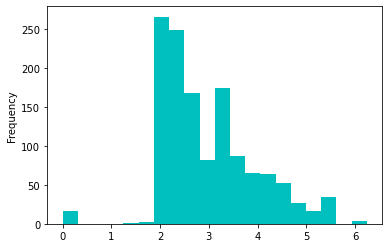

In [131]:
LogFare.plot(kind='hist', color='c', bins=20);

In [133]:
# Binning using qcut() function
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [135]:
# You can name the bins with the label parameter aka discretization
pd.qcut(df.Fare, 4, labels=['Very Low', 'Low', 'High', 'Very High'])

PassengerId
1        Very Low
2       Very High
3             Low
4       Very High
5             Low
          ...    
1305          Low
1306    Very High
1307     Very Low
1308          Low
1309         High
Name: Fare, Length: 1309, dtype: category
Categories (4, object): ['Very Low' < 'Low' < 'High' < 'Very High']

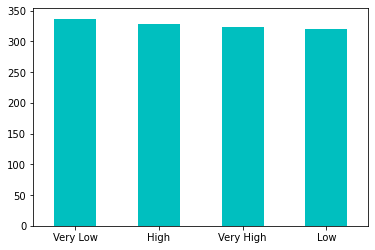

In [137]:
# Plot the numbers in each bins
pd.qcut(df.Fare, 4, labels=['Very Low', 'Low', 'High', 'Very High']).value_counts().plot(kind='bar', color='c', rot=0);

In [138]:
# create fare bin feature
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['Very_Low', 'Low', 'High', 'Very_High'])

In [139]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Very_Low
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Very_High
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Low


## Feature Engineering

##### New feature: Age_State

The feature **Age_State** has been created becaues the children may have been given priority to be in the life boat and in turn could have a better survival rate. In other words it could be an indicator of survival

In [140]:
df['Age_State'] = np.where(df.Age >= 18, 'Adult', 'Child')

In [141]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,Age_State
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Very_Low,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Very_High,Adult
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Low,Adult


In [142]:
df.Age_State.value_counts()

Adult    1147
Child     162
Name: Age_State, dtype: int64

In [144]:
pd.crosstab(df[df.Survived != -1].Survived, df[df.Survived != -1].Age_State)

Age_State,Adult,Child
Survived,,
0,495,54
1,279,63


##### New Feature: Family_size

In [145]:
df['Family_size'] = df.Parch = df.SibSp + 1 # 1 for self

In [146]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,Age_State,Family_size
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,2,A/5 21171,7.2500,NaN,S,Mr,Very_Low,Adult,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,2,PC 17599,71.2833,C85,C,Mrs,Very_High,Adult,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,1,STON/O2. 3101282,7.9250,NaN,S,Miss,Low,Adult,1


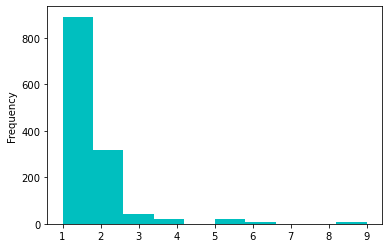

In [148]:
df.Family_size.plot(kind='hist', color='c');

In [150]:
df.loc[df['Family_size'] == df['Family_size'].max(), ['Name', 'Sex', 'Survived', 'Family_size', 'Ticket']]

,Name,Sex,Survived,Family_size,Ticket
PassengerId,,,,,
160,"Sage, Master. Thomas Henry",male,0,9,CA. 2343
181,"Sage, Miss. Constance Gladys",female,0,9,CA. 2343
202,"Sage, Mr. Frederick",male,0,9,CA. 2343
325,"Sage, Mr. George John Jr",male,0,9,CA. 2343
793,"Sage, Miss. Stella Anna",female,0,9,CA. 2343
847,"Sage, Mr. Douglas Bullen",male,0,9,CA. 2343
864,"Sage, Miss. Dorothy Edith ""Dolly""",female,0,9,CA. 2343
1080,"Sage, Miss. Ada",female,-1,9,CA. 2343
1252,"Sage, Master. William Henry",male,-1,9,CA. 2343


In [155]:
pd.crosstab(df[df.Survived != -1].Survived, df[df.Survived != -1].Family_size)

Family_size,1,2,3,4,5,6,9
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


##### New Feature: IsMother

In [157]:
# title not miss implies married
df['Is_mother'] = np.where(((df.Sex == 'female') & (df.Age > 18) & (df.Parch > 0) & (df.Title != 'Miss')), 1, 0)

In [158]:
pd.crosstab(df[df.Survived != -1].Survived, df[df.Survived != -1].Is_mother)

Is_mother,0,1
Survived,,
0,524,25
1,244,98


##### New feature: Deck

In [159]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [164]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [175]:
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [176]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
df['Deck'] = df.Cabin.map(get_deck)

In [177]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,Age_State,Family_size,Is_mother,Deck
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,2,A/5 21171,7.2500,NaN,S,Mr,Very_Low,Adult,2,0,Z
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,2,PC 17599,71.2833,C85,C,Mrs,Very_High,Adult,2,1,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,1,STON/O2. 3101282,7.9250,NaN,S,Miss,Low,Adult,1,0,Z


In [178]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [179]:
pd.crosstab(df[df.Survived != -1].Survived, df[df.Survived != -1].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


## Categorical feature encoding

In [180]:
df['Is_male'] = np.where(df.Sex == 'male', 1, 0)

In [181]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_Bin,Age_State,Family_size,Is_mother,Deck,Is_male
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,2,A/5 21171,7.2500,NaN,S,Mr,Very_Low,Adult,2,0,Z,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,2,PC 17599,71.2833,C85,C,Mrs,Very_High,Adult,2,1,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,1,STON/O2. 3101282,7.9250,NaN,S,Miss,Low,Adult,1,0,Z,0


In [182]:
df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked'])

In [184]:
df['Is_adult'] = np.where(df.Age_State == 'Adult', 1, 0)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            1309 non-null   int64  
 1   Name                1309 non-null   object 
 2   Sex                 1309 non-null   object 
 3   Age                 1309 non-null   float64
 4   SibSp               1309 non-null   int64  
 5   Parch               1309 non-null   int64  
 6   Ticket              1309 non-null   object 
 7   Fare                1309 non-null   float64
 8   Cabin               294 non-null    object 
 9   Age_State           1309 non-null   object 
 10  Family_size         1309 non-null   int64  
 11  Is_mother           1309 non-null   int32  
 12  Is_male             1309 non-null   int32  
 13  Deck_A              1309 non-null   uint8  
 14  Deck_B              1309 non-null   uint8  
 15  Deck_C              1309 non-null   uint8  
 16  Deck_D

## Drop and reorder columns

In [186]:
# drop columns
df.drop(['Cabin', 'Name', 'Sex', 'Parch', 'Ticket', 'SibSp'], axis=1, inplace=True)

In [187]:
# reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [188]:
df.head(3)

,Survived,Age,Fare,Age_State,Family_size,Is_mother,Is_male,Deck_A,Deck_B,Deck_C,...,Title_Officer,Title_Sir,Fare_Bin_Very_Low,Fare_Bin_Low,Fare_Bin_High,Fare_Bin_Very_High,Embarked_C,Embarked_Q,Embarked_S,Is_adult
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,Adult,2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,1,38.0,71.2833,Adult,2,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
3,1,26.0,7.9250,Adult,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


## Save processed data

In [189]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')

In [190]:
#train data
df.loc[df.Survived != -1].to_csv(write_train_path)
#test data
columns = [column for column in df.columns if column != 'Survived']
df.loc[df.Survived == -1, columns].to_csv(write_test_path)

# Advanced visualization

In [191]:
import matplotlib.pyplot as plt

In [192]:
%matplotlib inline

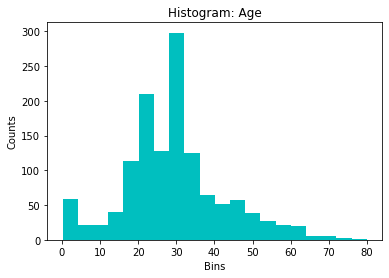

In [194]:
plt.hist(df.Age, bins=20, color='c')
plt.title('Histogram: Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()